# Part - 1

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, \
                            confusion_matrix, precision_score, \
                            recall_score, f1_score, roc_curve, \
                            roc_auc_score, ConfusionMatrixDisplay, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## 1.1 Import Dataset

In [2]:
df = pd.read_csv("Public_School_Characteristics_2020-21.csv", low_memory=False)


In [3]:
df.head()

,X,Y,OBJECTID,NCESSCH,SURVYEAR,STABR,LEAID,ST_LEAID,LEA_NAME,SCH_NAME,...,HIALF,HI,TRALM,TRALF,TR,WHALM,WHALF,WH,LATCOD,LONCOD
0,-86.206200,34.2602,1,10000500870,2020-2021,AL,100005,AL-101,Albertville City,Albertville Middle School,...,230.0,469.0,19.0,10.0,29.0,187.0,184.0,371.0,34.2602,-86.206200
1,-86.204900,34.2622,2,10000500871,2020-2021,AL,100005,AL-101,Albertville City,Albertville High School,...,371.0,785.0,17.0,21.0,38.0,368.0,338.0,706.0,34.2622,-86.204900
2,-86.220100,34.2733,3,10000500879,2020-2021,AL,100005,AL-101,Albertville City,Albertville Intermediate School,...,253.0,481.0,17.0,12.0,29.0,177.0,168.0,345.0,34.2733,-86.220100
3,-86.221806,34.2527,4,10000500889,2020-2021,AL,100005,AL-101,Albertville City,Albertville Elementary School,...,237.0,497.0,7.0,8.0,15.0,180.0,160.0,340.0,34.2527,-86.221806
4,-86.193300,34.2898,5,10000501616,2020-2021,AL,100005,AL-101,Albertville City,Albertville Kindergarten and PreK,...,137.0,288.0,6.0,7.0,13.0,108.0,108.0,216.0,34.2898,-86.193300


In [4]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'NCESSCH', 'SURVYEAR', 'STABR', 'LEAID',
       'ST_LEAID', 'LEA_NAME', 'SCH_NAME', 'LSTREET1', 'LSTREET2', 'LCITY',
       'LSTATE', 'LZIP', 'LZIP4', 'PHONE', 'CHARTER_TEXT', 'MAGNET_TEXT',
       'VIRTUAL', 'GSLO', 'GSHI', 'SCHOOL_LEVEL', 'TITLEI', 'STITLEI',
       'STATUS', 'SCHOOL_TYPE_TEXT', 'SY_STATUS_TEXT', 'ULOCALE', 'NMCNTY',
       'TOTFRL', 'FRELCH', 'REDLCH', 'PK', 'KG', 'G01', 'G02', 'G03', 'G04',
       'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'UG',
       'AE', 'TOTMENROL', 'TOTFENROL', 'TOTAL', 'MEMBER', 'FTE', 'STUTERATIO',
       'AMALM', 'AMALF', 'AM', 'ASALM', 'ASALF', 'AS', 'BLALM', 'BLALF', 'BL',
       'HPALM', 'HPALF', 'HP', 'HIALM', 'HIALF', 'HI', 'TRALM', 'TRALF', 'TR',
       'WHALM', 'WHALF', 'WH', 'LATCOD', 'LONCOD'],
      dtype='object')

https://nces.ed.gov/programs/edge/Geographic/SchoolLocations

- VIRTUAL- virtual or online school
- GSLO: Lowest grade level offered by the school
- GSHI: Highest grade level offered by the school
- SCHOOL_LEVEL: Indicates the level of the school
- TITLEI: Indicates whether the school is a Title I school
- STITLEI: Title I status within the state
- STATUS: Status of the school
- SCHOOL_TYPE_TEXT: Textual description of the school type
- SY_STATUS_TEXT: Textual description of the school year status
- ULOCALE: Urban-centric locale code indicating the schools location relative to urban areas
- FRELCH: Free lunch programs enrolled in the school
- REDLCH: Reduced-price lunch programs enrolled in the school
- TOTMENROL: Total male enrollment
- TOTFENROL: Total female enrollment
- MEMBER: Membership count (another term for enrollment).
- FTE: full-time equivalent staff members.
- STUTERATIO: Student-to-teacher ratio
- AMALM, AMALF, AM, ASALM, ASALF, AS, BLALM, BLALF, BL, HPALM, HPALF, HP, HIALM, HIALF, HI, TRALM, TRALF, TR, WHALM, WHALF, WH - different demographic (F, M and total enrollment)
    

## 1.2 Data Preprocessing

#### Step 1 - exclude all the columns that are unnecessary for modelling

#### Step 2 - remove enrollment to each grade level, only consider total enrollment

In [5]:
cols = ['OBJECTID','STABR', 'LEAID', 'SCH_NAME', 'CHARTER_TEXT', 'MAGNET_TEXT', 'VIRTUAL', 'GSLO', 'GSHI', 'FRELCH', 'REDLCH',
        'SCHOOL_LEVEL', 'TITLEI', 'STITLEI', 'STATUS', 'SCHOOL_TYPE_TEXT', 'SY_STATUS_TEXT', 'ULOCALE', 'STUTERATIO',
        'AMALM', 'AMALF', 'ASALM', 'ASALF', 'BLALM', 'BLALF', 'HPALM', 'HPALF', 'HIALM', 'HIALF', 'TRALM', 'TRALF', 'WHALM', 'WHALF']

df = df[cols]

#### Step 3 - Look for null values

In [6]:
na_series = df.isna().sum()
na_series

OBJECTID                0
STABR                   0
LEAID                   0
SCH_NAME                0
CHARTER_TEXT            0
MAGNET_TEXT             0
VIRTUAL                 0
GSLO                    0
GSHI                    0
FRELCH              26605
REDLCH              26605
SCHOOL_LEVEL            0
TITLEI                  0
STITLEI                 0
STATUS                  0
SCHOOL_TYPE_TEXT        0
SY_STATUS_TEXT          0
ULOCALE                 0
STUTERATIO           1216
AMALM               31433
AMALF               31687
ASALM               17784
ASALF               18097
BLALM               11599
BLALF               12288
HPALM               40038
HPALF               40567
HIALM                4686
HIALF                4907
TRALM                8943
TRALF                9128
WHALM                4354
WHALF                4607
dtype: int64

#### Step 4 - There are null values, it could be replaced either with 0 or dropped.

In [7]:
#df.fillna(0, inplace = True)

df['STUTERATIO'].dropna(inplace=True) 
df.fillna(0, inplace=True)



In [8]:
df.describe()

,OBJECTID,LEAID,FRELCH,REDLCH,STATUS,STUTERATIO,AMALM,AMALF,ASALM,ASALF,BLALM,BLALF,HPALM,HPALF,HIALM,HIALF,TRALM,TRALF,WHALM,WHALF
count,100722.000000,1.007220e+05,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000,100722.000000
mean,50361.500000,2.894657e+06,190.154961,18.378477,1.075783,14.196908,2.496297,2.398682,13.560027,12.859455,37.284357,35.932934,1.075574,1.011080,71.161752,68.108199,11.097188,10.760867,114.918201,107.805812
std,29076.081244,1.658948e+06,259.866490,32.692328,0.586435,60.452560,12.849060,12.500261,42.658770,40.235866,73.538664,72.888833,9.966851,9.179666,122.174094,117.958973,17.071544,17.271579,140.377863,136.099826
min,1.000000,1.000050e+05,0.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25181.250000,1.302610e+06,0.000000,0.000000,1.000000,10.840000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,5.000000,1.000000,1.000000,16.000000,13.000000
50%,50361.500000,2.909860e+06,107.000000,6.000000,1.000000,13.970000,0.000000,0.000000,2.000000,2.000000,7.000000,6.000000,0.000000,0.000000,24.000000,23.000000,6.000000,6.000000,79.000000,73.000000
75%,75541.750000,4.218990e+06,278.000000,25.000000,1.000000,17.030000,1.000000,1.000000,9.000000,8.000000,40.000000,38.000000,0.000000,0.000000,87.000000,82.000000,15.000000,15.000000,164.000000,154.000000
max,100722.000000,7.800030e+06,6655.000000,1365.000000,8.000000,17900.000000,618.000000,690.000000,2044.000000,1473.000000,2619.000000,2741.000000,689.000000,612.000000,2335.000000,2214.000000,1790.000000,1748.000000,6887.000000,7410.000000


## 1.3 EDA - Data Visualisation

### 1.3.1 - Average Demographic Enrolllment in different school types

https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py

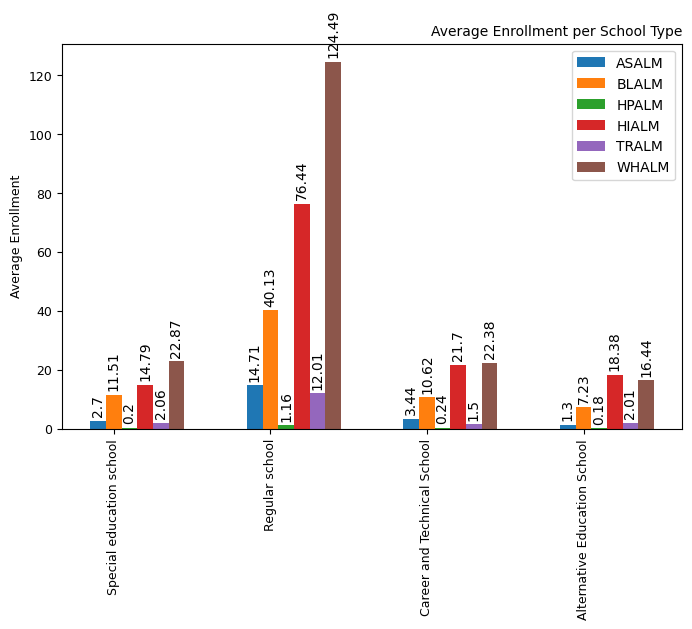

In [9]:
visual_df = df[['SCHOOL_TYPE_TEXT', 'AMALM', 'ASALM', 'BLALM', 'HPALM', 
                'HIALM', 'TRALM', 'WHALM']].groupby('SCHOOL_TYPE_TEXT',
                as_index = False).mean().round(2).sort_values(by='SCHOOL_TYPE_TEXT', 
                ascending=False)

school_type = visual_df['SCHOOL_TYPE_TEXT'].unique()
enrol_demo = {
    'ASALM': visual_df['ASALM'],
    'BLALM': visual_df['BLALM'],
    'HPALM': visual_df['HPALM'],
    'HIALM': visual_df['HIALM'],
    'TRALM': visual_df['TRALM'],
    'WHALM': visual_df['WHALM']
}

x = np.arange(len(school_type))
width = 0.1
multiplier = 0

fig, ax = plt.subplots(figsize = (8, 5))

for attribute, measurement in enrol_demo.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90, label_type='edge')
    multiplier += 1

ax.set_ylabel('Average Enrollment', fontsize = 9)
ax.set_title('Average Enrollment per School Type', fontsize = 10, loc='right')
ax.set_xticks(x + width, school_type)
ax.legend(loc='upper right', ncols=1)

plt.xticks(fontsize = 9, rotation=90)
plt.yticks(fontsize = 9)

plt.show()

### 1.3.2 - Average Enrollment for free lunch and reduced-price lunch

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

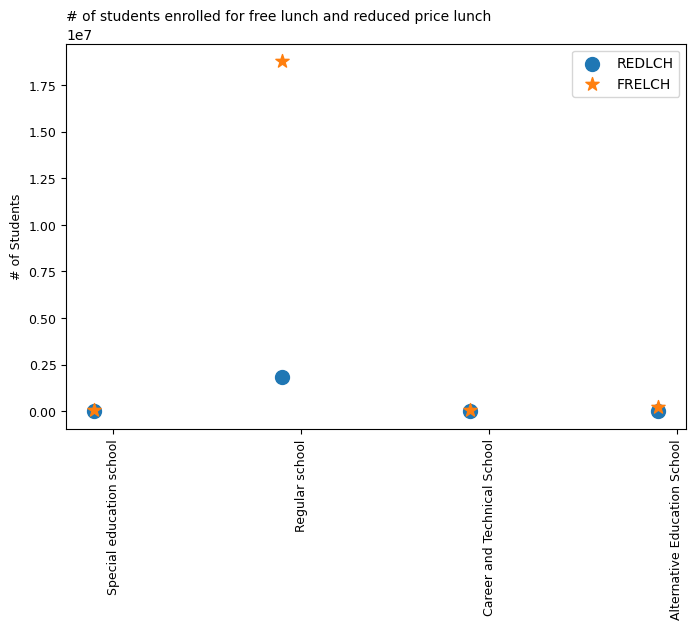

In [10]:
visual_df = df[['REDLCH', 'SCHOOL_TYPE_TEXT', 'FRELCH']].groupby(['SCHOOL_TYPE_TEXT'], 
                                            as_index=False).sum().sort_values(by='SCHOOL_TYPE_TEXT', 
                                                                              ascending=False)
fig, ax = plt.subplots(figsize = (8, 5))

marker = ['o', '*']

for i, col in enumerate(['REDLCH', 'FRELCH']):
    plt.scatter(visual_df['SCHOOL_TYPE_TEXT'],
                visual_df[col], 
                marker = marker[i], 
                label = col,
               s = 100)

ax.set_ylabel('# of Students', fontsize = 9)
ax.set_title('# of students enrolled for free lunch and reduced price lunch', loc='left',  fontsize = 10)
ax.set_xticks(x + width, visual_df['SCHOOL_TYPE_TEXT'])

ax.legend(loc='upper right', ncols=1)
plt.xticks(fontsize = 9, rotation=90)
plt.yticks(fontsize = 9)

plt.show()

### 1.3.3 - # of Title I schools in each type

In [11]:
visual_df = df[df['TITLEI'] == '1-Yes'][['TITLEI', 'SCHOOL_TYPE_TEXT']].groupby(['SCHOOL_TYPE_TEXT'], 
                                            as_index=False).count().sort_values(by='SCHOOL_TYPE_TEXT', 
                                                                              ascending=False)


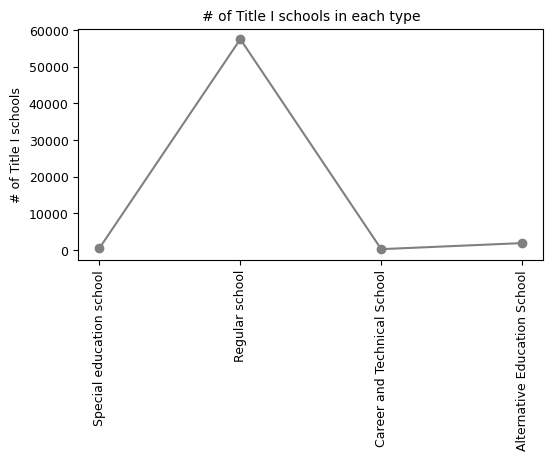

In [12]:

fig, ax = plt.subplots(figsize = (6, 3))

ax.plot(visual_df['SCHOOL_TYPE_TEXT'], visual_df['TITLEI'],label = visual_df['TITLEI'], marker='o', color='grey')

ax.set_ylabel('# of Title I schools', fontsize = 9)
ax.set_title('# of Title I schools in each type', fontsize = 10)
plt.xticks(fontsize = 9, rotation=90)
plt.yticks(fontsize = 9)

plt.show()

### 1.3.4 - Average Teacher-Student Ratio in Each School Type

https://matplotlib.org/stable/api/markers_api.html

In [13]:
visual_df = df[['STUTERATIO', 'SCHOOL_TYPE_TEXT']].groupby(['SCHOOL_TYPE_TEXT'], 
                                            as_index=False).mean().sort_values(by='SCHOOL_TYPE_TEXT', 
                                                                              ascending=False)
visual_df

,SCHOOL_TYPE_TEXT,STUTERATIO
3,Special education school,5.945236
2,Regular school,14.830542
1,Career and Technical School,2.032360
0,Alternative Education School,10.152192


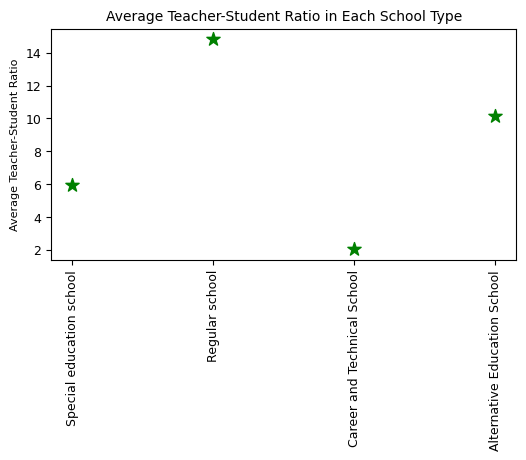

In [14]:

fig, ax = plt.subplots(figsize = (6, 3))

ax.scatter(visual_df['SCHOOL_TYPE_TEXT'], 
        visual_df['STUTERATIO'],
        label = visual_df['STUTERATIO'], 
        marker='*',
        color='g',
        s = 100)

ax.set_ylabel('Average Teacher-Student Ratio', fontsize = 8)
ax.set_title('Average Teacher-Student Ratio in Each School Type', fontsize=10)
plt.xticks(fontsize = 9, rotation=90)
plt.yticks(fontsize = 9)

plt.show()

### 1.3.5 - # of Schools in different locale

https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py

In [15]:
df['School_Locale_Count'] = 0
visual_df = df[['ULOCALE', 'SCHOOL_TYPE_TEXT', 'School_Locale_Count']].groupby(['SCHOOL_TYPE_TEXT', 'ULOCALE'], 
                                            as_index=False).count().sort_values(by='SCHOOL_TYPE_TEXT', 
                                                                              ascending=False)

pivot_df = visual_df.pivot(index="SCHOOL_TYPE_TEXT", columns=['ULOCALE'], values="School_Locale_Count")
pivot_df

ULOCALE,11-City: Large,12-City: Mid-size,13-City: Small,21-Suburb: Large,22-Suburb: Mid-size,23-Suburb: Small,31-Town: Fringe,32-Town: Distant,33-Town: Remote,41-Rural: Fringe,42-Rural: Distant,43-Rural: Remote
SCHOOL_TYPE_TEXT,,,,,,,,,,,,
Alternative Education School,889,465,535,1232,199,106,203,485,340,637,315,182
Career and Technical School,183,64,131,325,39,40,45,144,144,264,123,91
Regular school,13788,5279,5707,24300,2987,1793,2623,5388,3536,10580,9584,6030
Special education school,273,154,175,595,55,47,73,164,92,188,92,38


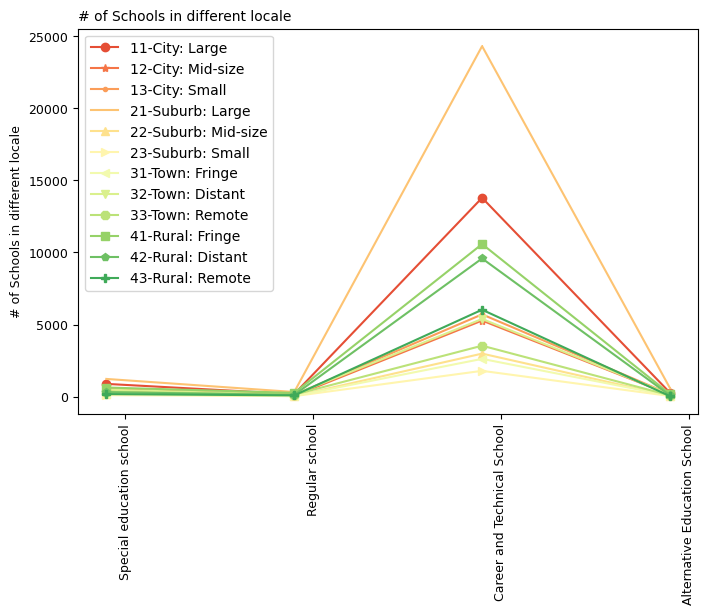

In [16]:

fig, ax = plt.subplots(figsize = (8, 5))

marker = ['o', '*', '.', ',', '^', '>', '<', 'v', '8', 's', 'p', 'P']
color = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, 12))

for i, col in enumerate(pivot_df.columns):
    plt.plot(pivot_df.index, pivot_df[col], marker = marker[i], c = color[i], label = col)

ax.set_ylabel('# of Schools in different locale', fontsize = 9)
ax.set_title('# of Schools in different locale', loc='left',  fontsize = 10)
ax.set_xticks(x + width, school_type)

ax.legend(loc='upper left', ncols=1)
plt.xticks(fontsize = 9, rotation=90)
plt.yticks(fontsize = 9)

plt.show()

### 1.3.6 - # of schools providing different modes of teaching

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py

In [17]:
df['School_virtual_count'] = 0
visual_df = df[['SCHOOL_TYPE_TEXT', 'VIRTUAL', 'School_virtual_count']].groupby(['SCHOOL_TYPE_TEXT', 'VIRTUAL'],
                as_index = False).count().round(2).sort_values(by='SCHOOL_TYPE_TEXT', 
                ascending=False)

pivot_df = visual_df.pivot(index="SCHOOL_TYPE_TEXT", columns=['VIRTUAL'], values="School_virtual_count")
pivot_df.fillna(0, inplace=True)
pivot_df

VIRTUAL,Full Virtual,M,N,Not Virtual,Supplemental Virtual,Virtual with face to face options
SCHOOL_TYPE_TEXT,,,,,,
Alternative Education School,108.0,2110.0,352.0,2114.0,820.0,84.0
Career and Technical School,3.0,112.0,13.0,964.0,488.0,13.0
Regular school,705.0,22197.0,583.0,44933.0,22720.0,457.0
Special education school,2.0,453.0,11.0,1145.0,335.0,0.0


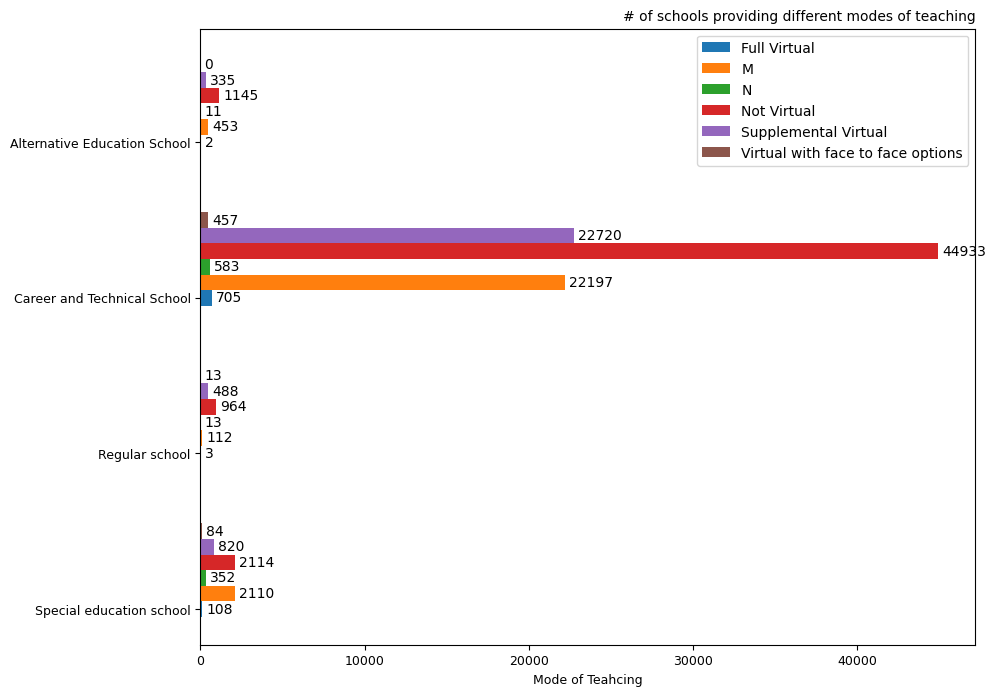

In [18]:
school_type = visual_df['SCHOOL_TYPE_TEXT'].unique()

x = np.arange(len(school_type))
width = 0.1
multiplier = 0

fig, ax = plt.subplots(figsize = (10, 8))

for col in pivot_df.columns:
    offset = width * multiplier
    rects = ax.barh(x + offset, pivot_df[col], width, label=col)
    ax.bar_label(rects, padding=3, label_type='edge')
    multiplier += 1

ax.set_xlabel('Mode of Teahcing', fontsize = 9)
ax.set_title('# of schools providing different modes of teaching', fontsize = 10, loc='right')
ax.set_yticks(x, school_type)
ax.legend(loc='upper right', ncols=1)

plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

plt.show()

## 1.4 Encoding String type Categorical columns

In [19]:
encoding_columns = ['GSHI', 'GSLO', 'ULOCALE', 'SY_STATUS_TEXT', 'SCHOOL_TYPE_TEXT', 'STITLEI', 'TITLEI',
                    'SCHOOL_LEVEL', 'VIRTUAL', 'MAGNET_TEXT', 'CHARTER_TEXT', 'SCH_NAME', 'STABR']

new = df[encoding_columns].describe().round(2)
new.transpose()

,count,unique,top,freq
GSHI,100722,19,05,28323
GSLO,100722,18,PK,32063
ULOCALE,100722,12,21-Suburb: Large,26452
SY_STATUS_TEXT,100722,7,Currently operational,98717
SCHOOL_TYPE_TEXT,100722,4,Regular school,91595
STITLEI,100722,4,1-Yes,50240
TITLEI,100722,4,1-Yes,60044
SCHOOL_LEVEL,100722,10,Elementary,53024
VIRTUAL,100722,6,Not Virtual,49156
MAGNET_TEXT,100722,4,No,62768


In [20]:
le_stabr = preprocessing.LabelEncoder()

label_encoder = preprocessing.LabelEncoder()
for col in encoding_columns:
    df[col] = label_encoder.fit_transform(df[col])


## 1.5 Normalize the continuous values

In [21]:
norm_cols = ['AMALM','AMALF', 'ASALM', 'ASALF', 'BLALM', 'BLALF', 'HPALM', 'HPALF', 'HIALM',
            'HIALF', 'TRALM', 'TRALF', 'WHALM', 'WHALF']

In [22]:
df[norm_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AMALM,100722.0,2.496297,12.849060,0.0,0.0,0.0,1.0,618.0
AMALF,100722.0,2.398682,12.500261,0.0,0.0,0.0,1.0,690.0
ASALM,100722.0,13.560027,42.658770,0.0,0.0,2.0,9.0,2044.0
ASALF,100722.0,12.859455,40.235866,0.0,0.0,2.0,8.0,1473.0
BLALM,100722.0,37.284357,73.538664,0.0,1.0,7.0,40.0,2619.0
BLALF,100722.0,35.932934,72.888833,0.0,1.0,6.0,38.0,2741.0
HPALM,100722.0,1.075574,9.966851,0.0,0.0,0.0,0.0,689.0
HPALF,100722.0,1.011080,9.179666,0.0,0.0,0.0,0.0,612.0
HIALM,100722.0,71.161752,122.174094,0.0,5.0,24.0,87.0,2335.0
HIALF,100722.0,68.108199,117.958973,0.0,5.0,23.0,82.0,2214.0


In [23]:
df[norm_cols] = preprocessing.normalize(df[norm_cols])

In [24]:
df[norm_cols].head()

,AMALM,AMALF,ASALM,ASALF,BLALM,BLALF,HPALM,HPALF,HIALM,HIALF,TRALM,TRALF,WHALM,WHALF
0,0.002358,0.002358,0.000000,0.009431,0.042441,0.035368,0.0,0.000000,0.563526,0.542305,0.044799,0.023578,0.440918,0.433844
1,0.001334,0.000000,0.005336,0.002668,0.044023,0.049359,0.0,0.000000,0.552288,0.494925,0.022678,0.028015,0.490922,0.450902
2,0.007145,0.002382,0.009526,0.007145,0.028579,0.028579,0.0,0.002382,0.543006,0.602547,0.040487,0.028579,0.421544,0.400110
3,0.004674,0.004674,0.009349,0.000000,0.051418,0.060767,0.0,0.000000,0.607672,0.553917,0.016360,0.018698,0.420696,0.373952
4,0.011718,0.003906,0.007812,0.000000,0.062497,0.066403,0.0,0.000000,0.589817,0.535132,0.023436,0.027342,0.421856,0.421856


In [25]:
new_cols = ['STABR', 'CHARTER_TEXT', 'MAGNET_TEXT', 'VIRTUAL', 'GSLO', 'GSHI', 'SCHOOL_LEVEL', 'TITLEI', 'STITLEI', 
            'STATUS', 'SCHOOL_TYPE_TEXT', 'SY_STATUS_TEXT', 'ULOCALE','AMALM', 'AMALF', 'ASALM', 'STUTERATIO',
            'ASALF', 'BLALM', 'BLALF', 'HPALM', 'HPALF', 'HIALM', 'HIALF', 'TRALM', 'TRALF', 'WHALM', 'WHALF']

In [26]:
df[new_cols]

,STABR,CHARTER_TEXT,MAGNET_TEXT,VIRTUAL,GSLO,GSHI,SCHOOL_LEVEL,TITLEI,STITLEI,STATUS,...,BLALM,BLALF,HPALM,HPALF,HIALM,HIALF,TRALM,TRALF,WHALM,WHALF
0,1,1,2,3,6,7,3,0,0,1,...,0.042441,0.035368,0.000000,0.000000,0.563526,0.542305,0.044799,0.023578,0.440918,0.433844
1,1,1,2,3,8,11,2,0,0,1,...,0.044023,0.049359,0.000000,0.000000,0.552288,0.494925,0.022678,0.028015,0.490922,0.450902
2,1,1,2,3,4,5,3,0,0,1,...,0.028579,0.028579,0.000000,0.002382,0.543006,0.602547,0.040487,0.028579,0.421544,0.400110
3,1,1,2,3,2,3,1,0,0,1,...,0.051418,0.060767,0.000000,0.000000,0.607672,0.553917,0.016360,0.018698,0.420696,0.373952
4,1,1,2,3,16,14,1,0,0,1,...,0.062497,0.066403,0.000000,0.000000,0.589817,0.535132,0.023436,0.027342,0.421856,0.421856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100717,51,0,2,0,13,2,1,0,0,1,...,0.764502,0.602988,0.000000,0.000000,0.161515,0.156131,0.005384,0.005384,0.010768,0.021535
100718,51,0,2,0,13,5,1,0,0,1,...,0.715148,0.679745,0.003540,0.003540,0.106210,0.120372,0.007081,0.003540,0.014161,0.017702
100719,51,0,2,0,16,4,1,0,0,1,...,0.783634,0.595219,0.004282,0.000000,0.137029,0.107054,0.000000,0.000000,0.025693,0.012846
100720,51,0,2,0,3,7,3,0,0,1,...,0.707691,0.658481,0.000000,0.000000,0.189811,0.168721,0.002343,0.000000,0.016403,0.025777


#### Looking for outliers

for key, value in df.items():
    q1 = value.quantile(0.25)
    q3 = value.quantile(0.75)
    iqr = q3 - q1
    v_col = value[(value <= q1 - 1.5 * iqr) | (value >= q3 + 1.5 * iqr)]
    percentage = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Outliers in column %s = %.2f%%" % (key, percentage))

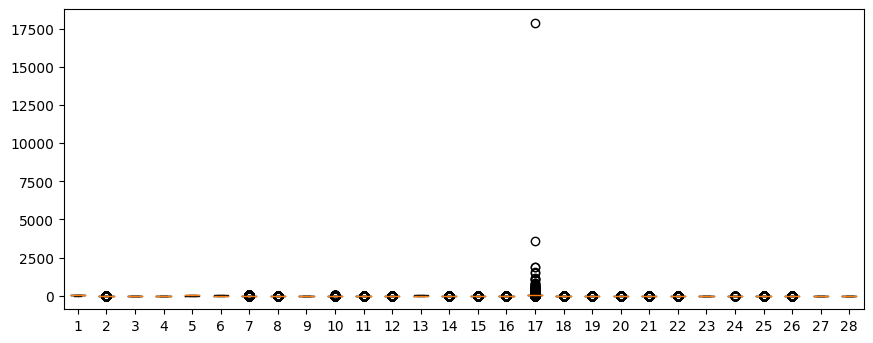

In [27]:
new_df = df[new_cols]
fig = plt.figure(figsize =(8, 3))
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(new_df)
plt.show()


In [28]:
# Exclude 17 - STUTERATIO

new_cols.remove('STUTERATIO')

## 1.6 Choose X and Y

In [110]:
X = df[new_cols].drop('SCHOOL_TYPE_TEXT', axis = 1)
y = df['SCHOOL_TYPE_TEXT']

## 1.7 Divide the dataset to training and testing


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = y)

## 1.8 Printing the shape of X and Y, training and testing

In [112]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80577, 26) (20145, 26) (80577,) (20145,)


# Part - 2

#### function to plot ROC, AUC

https://scikit-learn.org/1.0/auto_examples/model_selection/plot_roc.html

In [157]:
def draw_roc(y_test, y_pred, model_name):
    y_test_l = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
    y_pred_l = label_binarize(y_pred, classes=[0, 1, 2, 3, 4])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(y_test_l[:, i], y_pred_l[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_l.ravel(), y_pred_l.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(5)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot( fpr["micro"], tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink", linestyle=":", linewidth=4,
    )

    plt.plot( fpr["macro"], tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy", linestyle=":", linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(5), colors):
        plt.plot( fpr[i], tpr[i], color=color, lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic to multiclass: " +  model_name)
    plt.legend(loc="lower right")
    plt.show()
    

## 2.2 Apply Machine Learning to Model 'School Type'

### 2.2.1 Model 1 - Decision Trees

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [128]:
import warnings
warnings.filterwarnings('ignore')

Actual vs Predicted


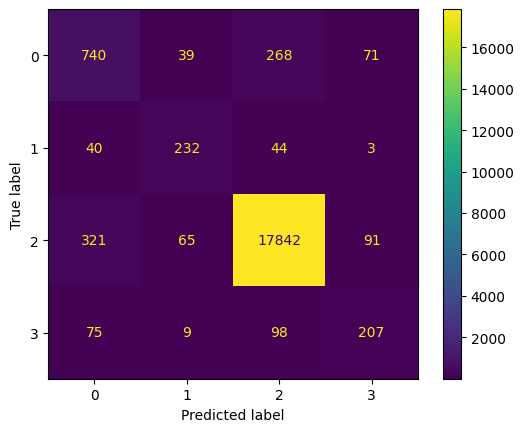

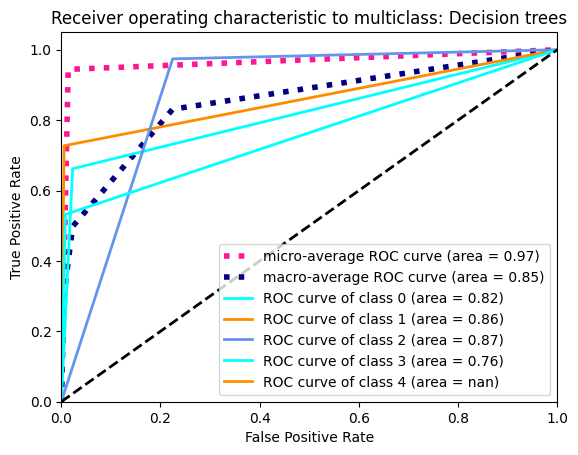

In [158]:
dt_classifier = tree.DecisionTreeClassifier(random_state=42)
dt_classifier = dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

dt_acc = round(accuracy_score(y_test, y_pred),2)
dt_prec = round(precision_score(y_test, y_pred, average = 'macro'),2)
dt_recall = round(recall_score(y_test, y_pred, average = 'macro'),2)

y_preb_probs = dt_classifier.predict_proba(X_test)
dt_roc = round(roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"),2)

# Confusion Matrix
print("Actual vs Predicted")
cm = confusion_matrix(y_test, y_pred, labels=dt_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)

disp.plot()
plt.show()

# ROC
draw_roc(y_test, y_pred, "Decision trees")


In [154]:
y_prob = dt_classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")

macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")

print(
    "One-vs-One ROC AUC scores (dt): {:.6f} (macro)".format(macro_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores (dt): {:.6f} (macro)".format(macro_roc_auc_ovr)
)

One-vs-One ROC AUC scores (dt): 0.827196 (macro)
One-vs-Rest ROC AUC scores (dt): 0.842456 (macro)


### 2.2.2 Model 2 - Random Forest

Actual vs Predicted


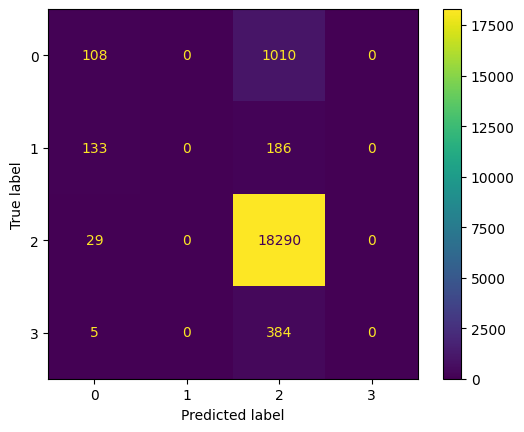

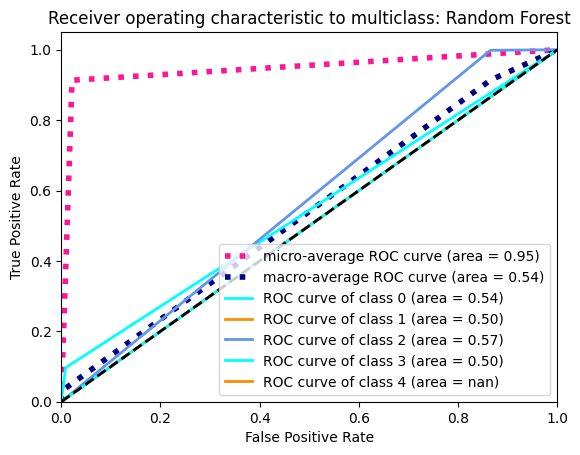

In [144]:
rf_classifier = RandomForestClassifier(n_estimators = 200, max_depth=3, random_state=42)
rf_classifier = rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

rf_acc = round(accuracy_score(y_test, y_pred),2)
rf_prec = round(precision_score(y_test, y_pred, average = 'macro', zero_division = 0),2)
rf_recall = round(recall_score(y_test, y_pred, average = 'macro', zero_division = 0),2)

y_preb_probs = rf_classifier.predict_proba(X_test)
rf_roc = round(roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"), 2)

# Confusion Matrix
print("Actual vs Predicted")
cm = confusion_matrix(y_test, y_pred, labels=dt_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)

disp.plot()
plt.show()

# ROC
draw_roc(y_test, y_pred, "Random Forest")


In [155]:
y_prob = rf_classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")

macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")

print(
    "One-vs-One ROC AUC scores (rf): {:.6f} (macro)".format(macro_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores (rf): {:.6f} (macro)".format(macro_roc_auc_ovr)
)

One-vs-One ROC AUC scores (rf): 0.786522 (macro)
One-vs-Rest ROC AUC scores (rf): 0.944237 (macro)


### 2.2.3 Model 3 - Logistic Regression

Actual vs Predicted


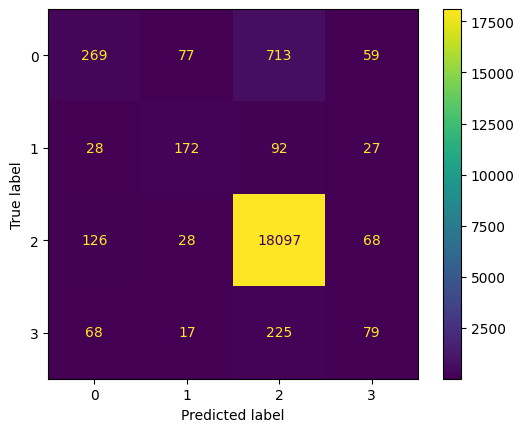

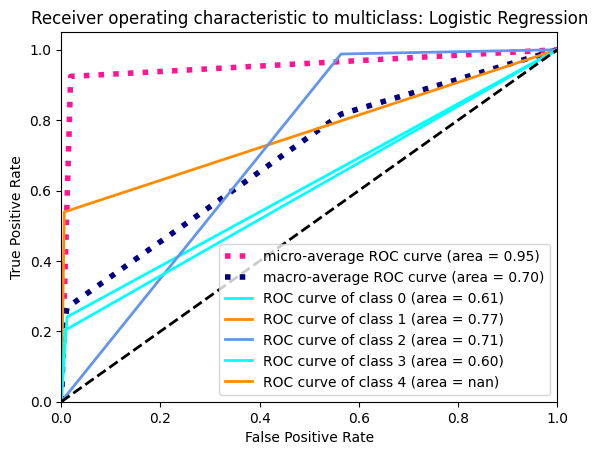

In [147]:
lr_classifier = LogisticRegression(random_state = 42, max_iter = 1000)
lr_classifier = lr_classifier.fit(X_train, y_train)
y_pred = lr_classifier.predict(X_test)

lr_acc = round(accuracy_score(y_test, y_pred),2)
lr_prec = round(precision_score(y_test, y_pred, average = 'macro', zero_division = 0),2)
lr_recall = round(recall_score(y_test, y_pred, average = 'macro', zero_division = 0),2)

y_preb_probs = lr_classifier.predict_proba(X_test)
lr_roc = round(roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr"),2)

# Confusion Matrix
print("Actual vs Predicted")
cm = confusion_matrix(y_test, y_pred, labels=dt_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)

disp.plot()
plt.show()

# ROC
draw_roc(y_test, y_pred, "Logistic Regression")


In [156]:
y_prob = lr_classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")

macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")

print(
    "One-vs-One ROC AUC scores (lr): {:.6f} (macro)".format(macro_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores (lr): {:.6f} (macro)".format(macro_roc_auc_ovr)
)

One-vs-One ROC AUC scores (lr): 0.857768 (macro)
One-vs-Rest ROC AUC scores (lr): 0.937483 (macro)


## Report Values

https://mkzia.github.io/eas503-book/chapters/03/table.html

+-----------------------------------------------------------+
|                 Model Performance Report                  |
+-------------------+---------+---------+---------+---------+
|      Models       |   Acc   |  Prec   |   Rec   |   ROC   |
+-------------------+---------+---------+---------+---------+
| Decision Trees    |  0.94   |  0.71   |  0.72   |  0.87   |
| Random Forest     |  0.91   |  0.33   |  0.27   |  0.95   |
| Linear Regression |  0.92   |  0.60   |  0.49   |  0.93   |
+-------------------+---------+---------+---------+---------+


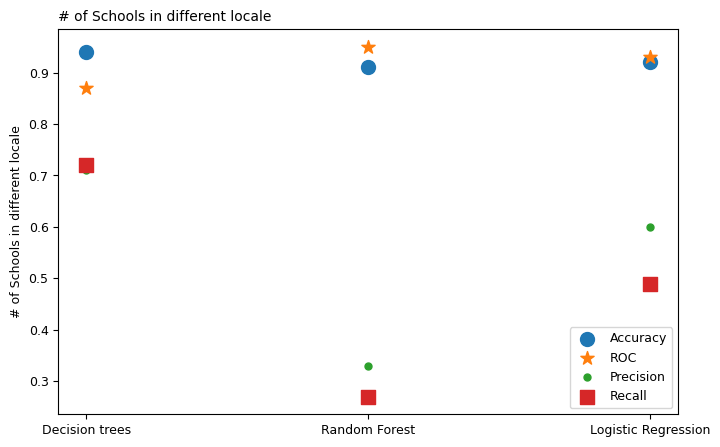

In [56]:
title = '|' + '{:^59}'.format('Model Performance Report') + '|'
line = '+' + '-' * 19 + '+' + ('-' * 9 + '+') * 4
row = '| {:<17} |' + ' {:^7,.2f} |' * 4

header = '| {:^17s} |'.format('Models') + (' {:^7s} |' * 4).format('Acc', 'Prec', 'Rec', 'ROC')
print('+' + '-'*(len(title)-2) + '+',
      title,
      line,
      header,
      line,
      row.format('Decision Trees', dt_acc, dt_prec, dt_recall, dt_roc),
      row.format('Random Forest', rf_acc, rf_prec, rf_recall, rf_roc),
      row.format('Linear Regression', lr_acc, lr_prec, lr_recall, lr_roc),
      line,
      sep='\n')

models = ['Decision trees', 'Random Forest', 'Logistic Regression']
enrol_demo = {
    'Accuracy': [dt_acc, rf_acc, lr_acc],
    'ROC': [dt_roc, rf_roc, lr_roc],
    'Precision': [dt_prec, rf_prec, lr_prec],
    'Recall': [dt_recall, rf_recall, lr_recall]
}

fig, ax = plt.subplots(figsize = (8, 5))
x = 4
marker = ['o', '*', '.', ',']

for i, k in enumerate(enrol_demo.keys()):
    plt.scatter(models, 
                enrol_demo[k], 
                marker = marker[i], 
                label = k, 
                s = 100)

ax.set_ylabel('# of Schools in different locale', fontsize = 9)
ax.set_title('# of Schools in different locale', loc='left',  fontsize = 10)

ax.legend(ncols = 1, loc='lower right', fontsize = 9)
plt.xticks(fontsize = 9)
plt.yticks(fontsize = 9)

plt.show()

##### Conclusion - Even though the accuracy of all models look good, precision, except for Decision trees is really small

##### So, Decision trees can be considered the better performing model